In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import movingpandas as mpd

In [3]:
mpd.show_versions()


MovingPandas 0.19.0

SYSTEM INFO
-----------
python     : 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
executable : C:\Users\zhuch\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe
machine    : Windows-10-10.0.22631-SP0

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : 3.9.1
GDAL data dir: C:\Users\zhuch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fiona\gdal_data
PROJ       : 9.3.0
PROJ data dir: C:\Users\zhuch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyproj\proj_dir\share\proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 1.0.1
pandas     : 2.2.2
fiona      : 1.10.0
numpy      : 2.0.0
shapely    : 2.0.6
pyproj     : 3.6.1
matplotlib : 3.9.2
mapclassify: None
geopy      : 2.4.1
holoviews  : 

Import packages

In [6]:
import pandas as pd
import geopandas as gpd
import shapely as shp

from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point,LineString, Polygon
from datetime import datetime, timedelta


This is Trajectory object in movingPandas

In [ ]:
# class Trajectory:
#     def __init__( 
#         self,
#         df, # GroPandas locations with time or Pandas DataFrame(Must have)
#         traj_id,(Track the movement)
#         obj_id=None,
#         t=None,(time)
#         x=None,
#         y=None,
#         crs="epsg:4326",
#         parent=None,
#     ):

In [8]:
df = pd.DataFrame([
    {'geometry': Point(0, 0), 't': datetime(2023, 7, 1, 12, 0, 0)},
    {'geometry': Point(6, 0), 't': datetime(2023, 7, 1, 12, 6, 0)},
    {'geometry': Point(6, 6), 't': datetime(2023, 7, 1, 12, 10, 0)},
    {'geometry': Point(9, 9), 't': datetime(2023, 7, 1, 12, 15, 0)}])

df = df.set_index('t')

# creat GeoDataFrame object
# EPSG:3857 always using in map, meter is the uni
gdf = GeoDataFrame(df, crs='EPSG:3857')
gdf

,geometry
t,
2023-07-01 12:00:00,POINT (0 0)
2023-07-01 12:06:00,POINT (6 0)
2023-07-01 12:10:00,POINT (6 6)
2023-07-01 12:15:00,POINT (9 9)


In [9]:
toy_traj = mpd.Trajectory(gdf,1)
toy_traj

Trajectory 1 (2023-07-01 12:00:00 to 2023-07-01 12:15:00) | Size: 4 | Length: 16.2m
Bounds: (0.0, 0.0, 9.0, 9.0)
LINESTRING (0 0, 6 0, 6 6, 9 9)

<Axes: >

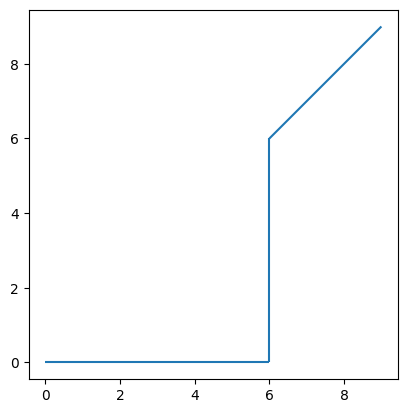

In [10]:
toy_traj.plot()

In [15]:
df = pd.read_csv('C:/NewLaptopChenInfo/StonyBrookUniversityInfo/Courses/Fall2024/Data set/MovingPandas/geolife_small.csv', delimiter=';')
df.head()

,X,Y,fid,id,sequence,trajectory_id,tracker,t
0,116.391305,39.898573,1,1,1,1,19,2008-12-11 04:42:14+00
1,116.391317,39.898617,2,2,2,1,19,2008-12-11 04:42:16+00
2,116.390928,39.898613,3,3,3,1,19,2008-12-11 04:43:26+00
3,116.390833,39.898635,4,4,4,1,19,2008-12-11 04:43:32+00
4,116.389410,39.898723,5,5,5,1,19,2008-12-11 04:43:47+00


In [17]:
traj_collection = mpd.TrajectoryCollection(df,'trajectory_id',t='t',x='X',y='Y')
print(traj_collection)

TrajectoryCollection with 5 trajectories


<Axes: >

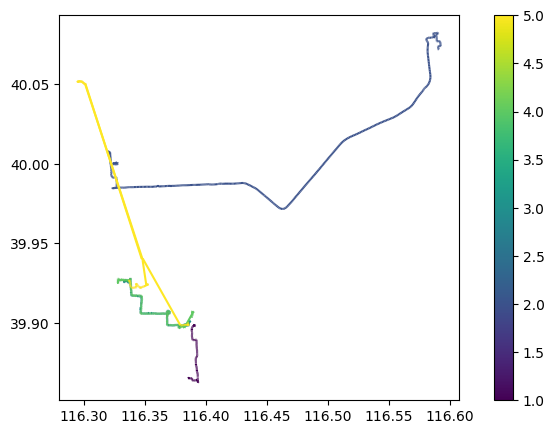

In [18]:
traj_collection.plot(column='trajectory_id', legend=True, figsize=(9,5))

Moving panda has add_speed, add_distance, add_timedelta, add_timedelta